In [10]:
import pandas as pd 
folder = "F:\dataSets\diabetes.csv"
diabetes = pd.read_csv(folder)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
diabetes.columns
cols_to_norm = ['Pregnancies','Glucose','BloodPressure','BMI','Insulin','DiabetesPedigreeFunction','SkinThickness']
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max() - x.min()))
#diabetes.head

In [12]:
import tensorflow as tf
preg = tf.feature_column.numeric_column('Pregnancies')
gluc = tf.feature_column.numeric_column('Glucose')
blood = tf.feature_column.numeric_column('BMI')
insul = tf.feature_column.numeric_column('Insulin')
pedi = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
skinthick = tf.feature_column.numeric_column('SkinThickness')
age = tf.feature_column.numeric_column('Age')

<Axes: >

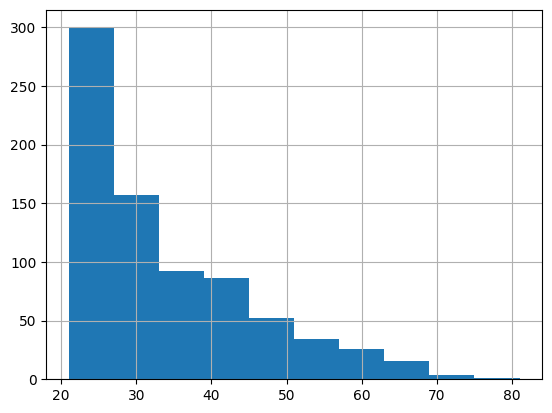

In [13]:
import matplotlib as plt
%matplotlib inline
diabetes['Age'].hist()


In [14]:
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])
feat_cols = [preg,gluc,blood,insul,pedi,skinthick,age_buckets]

In [15]:
x_data = diabetes.drop('Outcome',axis=1)
labels = diabetes['Outcome'] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33,random_state=101)


In [16]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_train,y=y_train
                                                    ,batch_size = 10
                                                    ,num_epochs = 1000
                                                    ,shuffle = True)
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)
model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpk8a5m4bg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf

In [17]:
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)
predictions = model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpk8a5m4bg\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.18277442], dtype=float32),
  'logistic': array([0.54556686], dtype=float32),
  'probabilities': array([0.45443314, 0.5455668 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.5652077], dtype=float32),
  'logistic': array([0.6376566], dtype=float32),
  'probabilities': array([0.3623433, 0.6376566], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.05324769], dtype=float32),
  'logistic': array([0.48669124], dtype=float32),
  'probabilities': array([0.51330876, 0.4866912 ], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 

In [18]:
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-02-27T01:02:39
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpk8a5m4bg\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.52520s
INFO:tensorflow:Finished evaluation at 2023-02-27-01:02:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72047246, accuracy_baseline = 0.6574803, auc = 0.7774795, auc_precision_recall = 0.6220505, average_loss = 0.54324144, global_step = 1000, label/mean = 0.34251967, loss = 0.5516385, precision = 0.5952381, prediction/mean = 0.38301164, recall = 0.57471263
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Admin\AppData\Local\Temp\tmpk8a5m4bg\model.ckpt-1000


{'accuracy': 0.72047246,
 'accuracy_baseline': 0.6574803,
 'auc': 0.7774795,
 'auc_precision_recall': 0.6220505,
 'average_loss': 0.54324144,
 'label/mean': 0.34251967,
 'loss': 0.5516385,
 'precision': 0.5952381,
 'prediction/mean': 0.38301164,
 'recall': 0.57471263,
 'global_step': 1000}